In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as ss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [17]:
df = pd.read_csv('F:\\dev_stuff\\DSP_TIME_SERIES\\air+quality\\AirQualityUCI.csv',sep = ';')

# Combine the Date and Time columns into a single datetime column
df['datetime'] = df['Date'] + ' ' + df['Time']
ah = [float(x.replace(',', '.')) for x in df["AH"].to_list()]

avg = [i for i in ah if i != -200]
ah = [i if i != -200 else np.mean(avg) for i in ah]





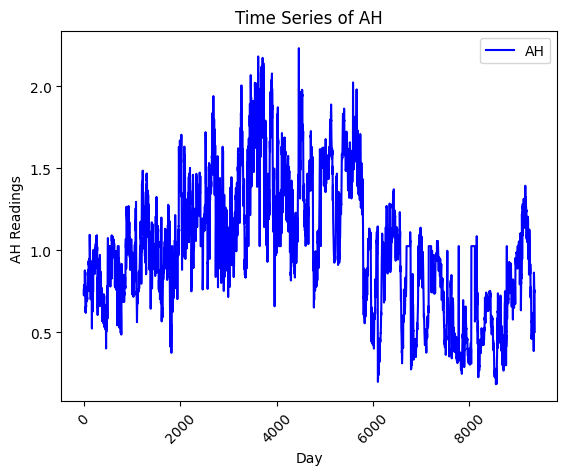

In [18]:
plt.plot(ah, label='AH', color='blue')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('AH Readings ')
plt.title('Time Series of AH')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

plt.show()

In [19]:
result = adfuller(ah)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -5.494517629071398
p-value: 2.138278755674246e-06


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


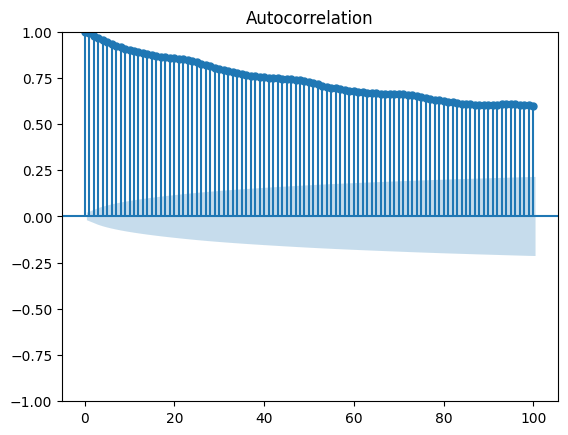

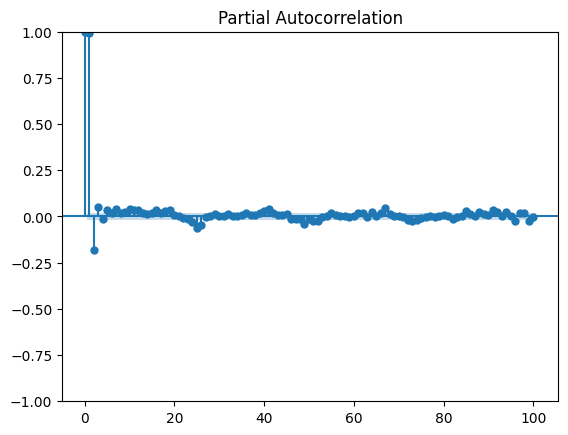

In [20]:
plot_acf(ah, lags = 100)
plot_pacf(ah, lags = 100)
print(1)
plt.show()

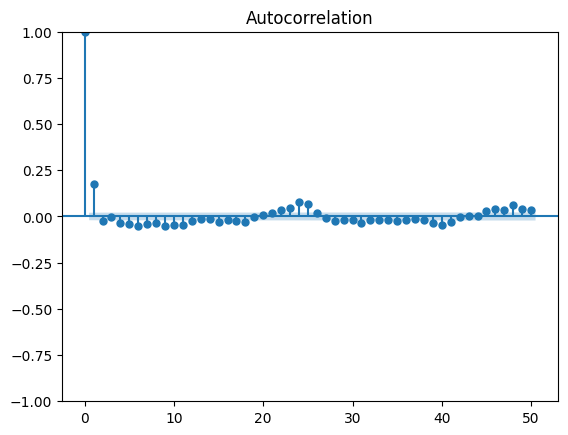

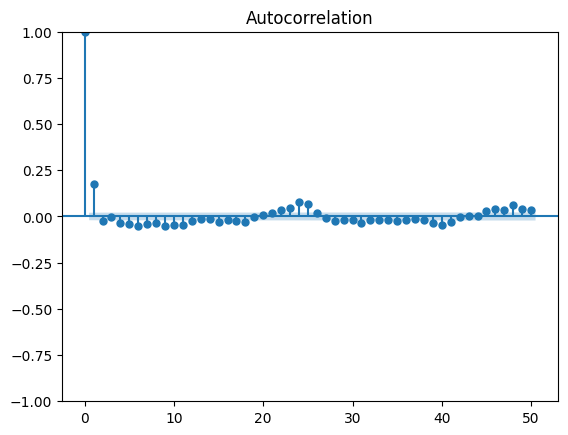

In [31]:
plot_acf(np.diff(ah), lags = 50)#, lags = list(range(10)))


In [22]:
temp_model = auto_arima(ah, seasonal=False, stepwise=True, suppress_warnings=True)


In [25]:
print(temp_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9357
Model:               SARIMAX(1, 1, 2)   Log Likelihood               14349.030
Date:                Wed, 29 Jan 2025   AIC                         -28688.060
Time:                        19:37:11   BIC                         -28652.342
Sample:                             0   HQIC                        -28675.930
                               - 9357                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.643e-06   6.81e-06     -0.681      0.496    -1.8e-05    8.71e-06
ar.L1          0.9585      0.004    256.063      0.000       0.951       0.966
ma.L1         -0.7940      0.005   -157.559      0.0

In [32]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 9357
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood               14361.349
Date:                            Wed, 29 Jan 2025   AIC                         -28712.698
Time:                                    19:51:36   BIC                         -28676.992
Sample:                                         0   HQIC                        -28700.570
                                           - 9357                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9816      0.002    498.661      0.000       0.978       0.985
ma.L1          0.1716      0.004   

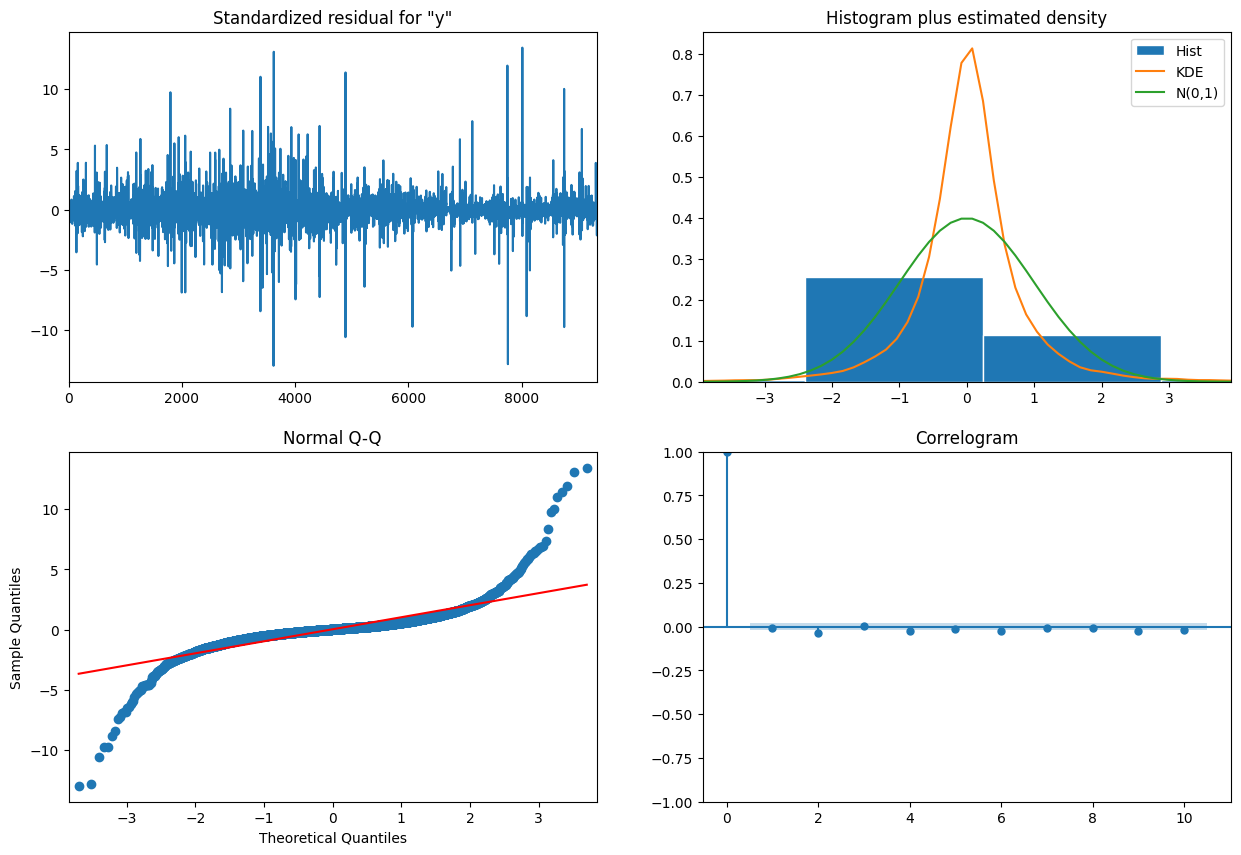

In [39]:
model = SARIMAX(ah, 
                order=(1, 0, 1), 
                seasonal_order=(1, 0, 1, 24), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(15, 10))
plt.show()



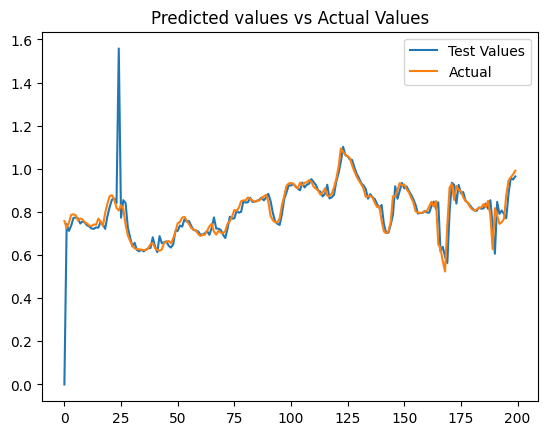

In [34]:
plt.plot(results.fittedvalues[:200], label = 'Test Values')
plt.plot(ah[:200], label = 'Actual')
plt.title("Predicted values vs Actual Values")
plt.legend()
plt.show()

In [35]:
def plot_actual_vs_forecast(actual, forecast, title="Actual vs Forecast", xlabel="Time", ylabel="Value"):
    plt.figure(figsize=(10, 6))
    
    # Plot actual data with a solid line
    plt.plot(actual, label='Actual', linestyle='-', linewidth=2, color='blue')
    
    # Plot forecast data with a dashed line
    plt.plot(list(range(len(actual), len(actual) + len(forecast))), forecast, label='Forecast', linestyle='--', linewidth=2, color='orange')
    
    # Add labels, title, and legend
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=12)
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Display the plot
    plt.show()

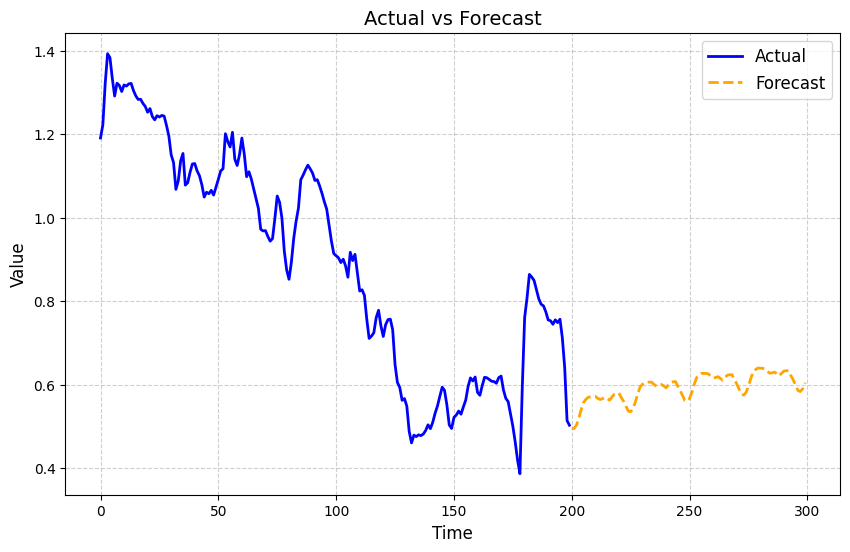

In [36]:
plot_actual_vs_forecast(ah[-200:], forecast = results.get_forecast(steps=100).predicted_mean)